# Problem Set 4 - Arath Reyes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson, gamma, norm
import warnings
warnings.filterwarnings('ignore')

## (a)

In [4]:
# Define the prior
a, b = 3, 1
prior = gamma(a)
# True Theta
theta = 2
m_prior, s_prior = prior.stats(moments = 'ms')
print(f'Prior Gamma(3,1) - Mean {m_prior} | Standard Deviation {s_prior}')

Prior Gamma(3,1) - Mean 3.0 | Standard Deviation 1.1547005383792517


In [5]:
sample = pd.DataFrame()
sample[f'Gamma'] = prior.rvs(size = 500_000)

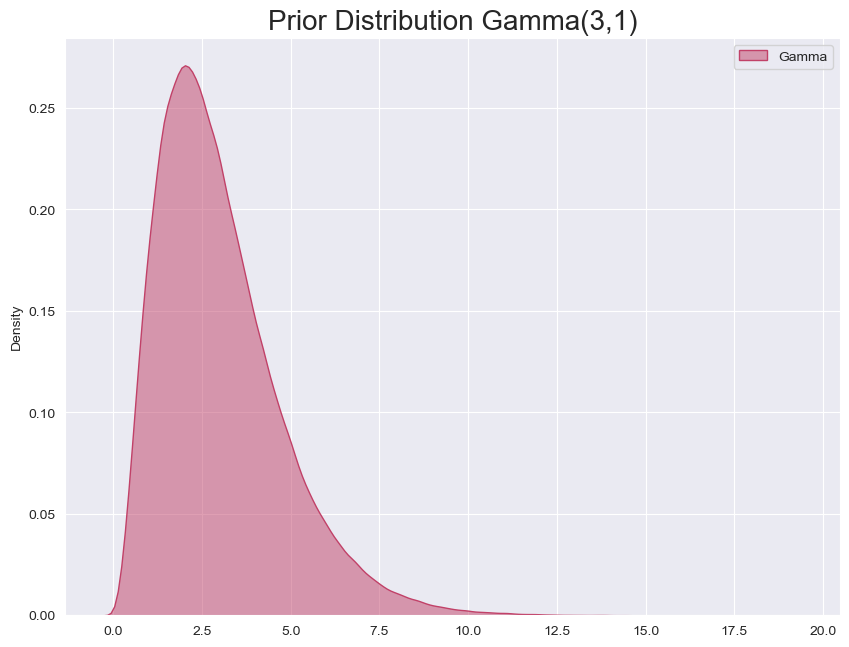

In [6]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,7.5))
ax = sns.kdeplot(data = sample,fill=True, common_norm=False, palette="flare", alpha=.5, linewidth=1)
ax.set_title(f'Prior Distribution Gamma(3,1)',fontsize = 20)
ax.set_ylabel('Density',fontsize = '10')
plt.show()

## (b)

In [8]:
sample = pd.DataFrame()
for x in [-1,0,1]:
    theta_likelihood = m_prior + x*s_prior
    likelihood = poisson(theta_likelihood)
    sample[f'Poisson({round(theta_likelihood,2)})'] = likelihood.rvs(size = 100_000)

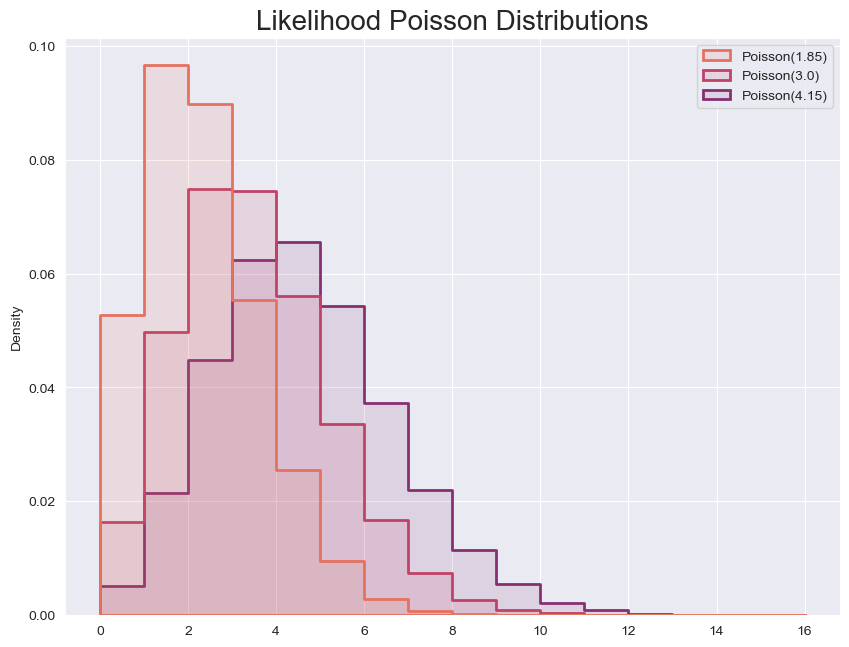

In [9]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,7.5))
ax = sns.histplot(sample, stat = 'density',binwidth = 1, palette="flare", alpha=.125, linewidth=2, element="step")
ax.set_title(f'Likelihood Poisson Distributions',fontsize = 20)
plt.show()

## (c)

In [11]:
sample = pd.DataFrame()
likelihood = poisson(theta)
sample[f'Poisson({round(theta,2)})'] = likelihood.rvs(size = 500)

In [12]:
posDf = pd.DataFrame()
pos_sample = pd.DataFrame()
posDf['Y'] = sample.cumsum()
alphas, betas, means, stds = [], [], [], []
for n in range(500):
    y = posDf['Y'][n]
    alpha, beta = a + y, b + n + 1
    alphas.append(alpha)
    betas.append(beta)
    means.append(alpha/beta)
    stds.append(np.sqrt(alpha)/beta)
    pos = gamma(a = alpha, scale = 1/beta)
    pos_sample[f'Pos({n+1})'] = pos.rvs(size = 10_000)
posDf['Alpha'], posDf['Beta'], posDf['Mean'], posDf['Std'] = alphas, betas, means, stds

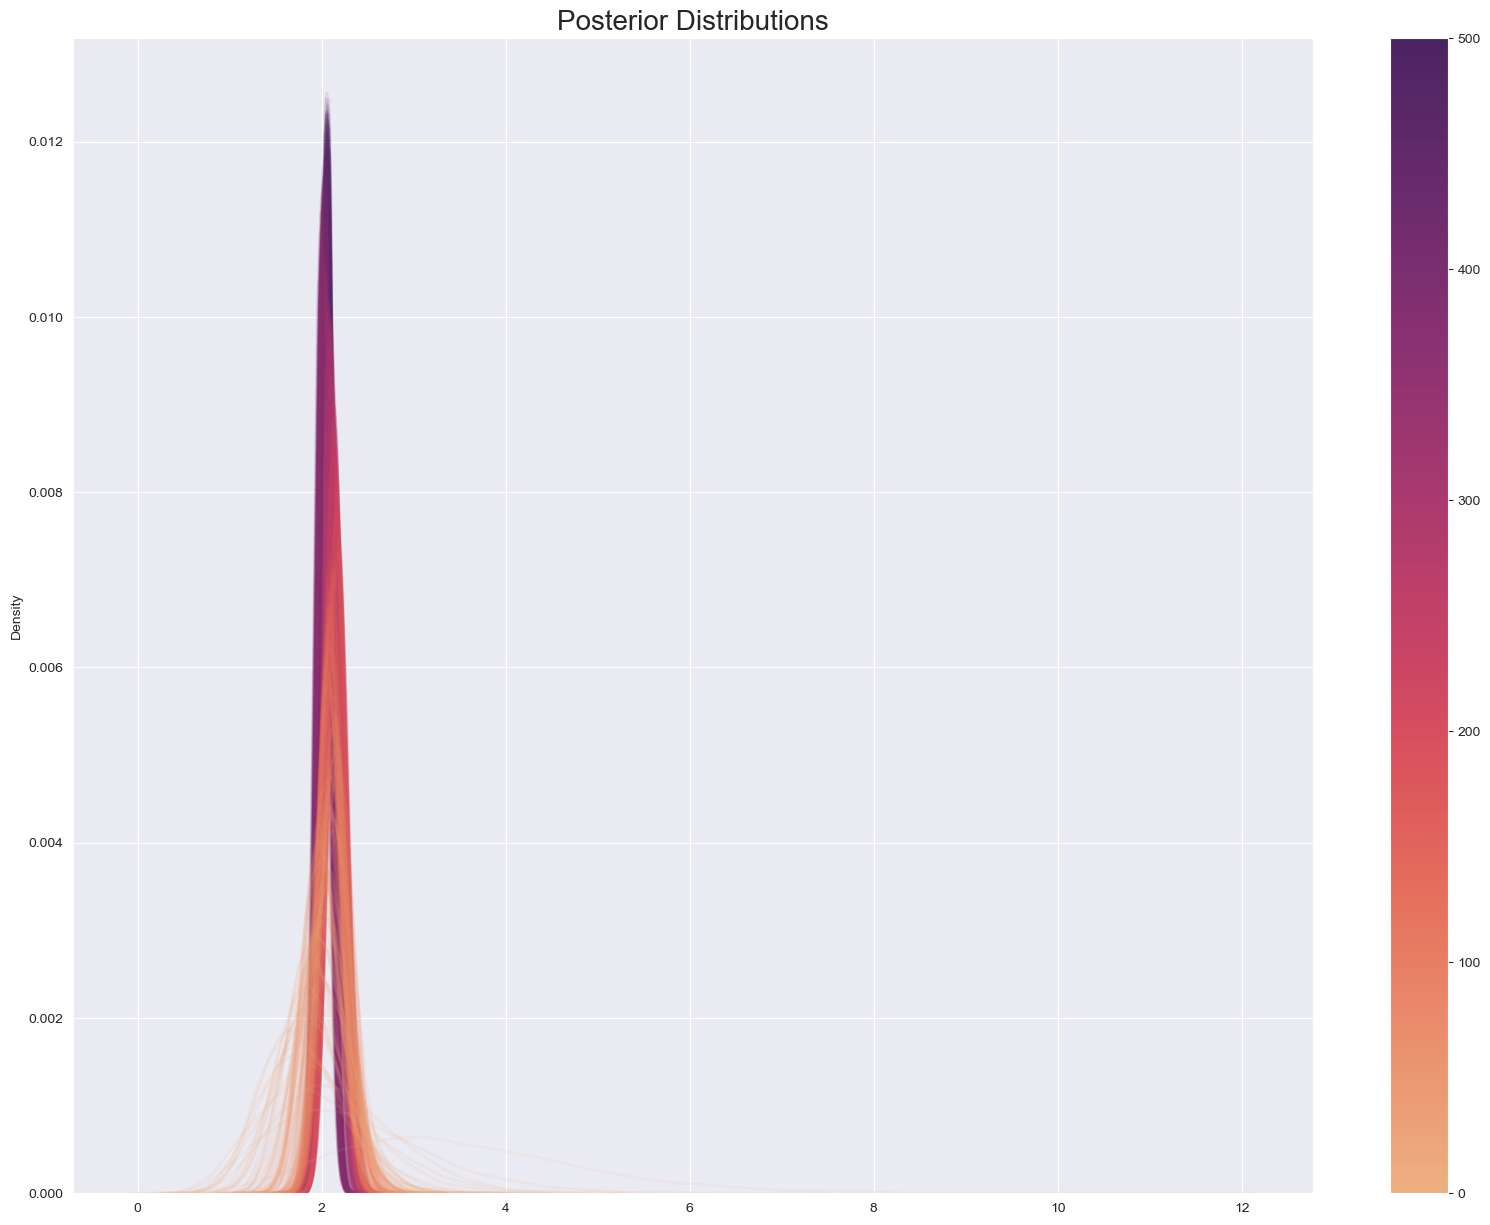

In [13]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,15))
ax = sns.kdeplot(data = pos_sample, fill=False, palette="flare", alpha=.1, linewidth=2, legend = False)
sm = plt.cm.ScalarMappable(cmap="flare", norm= plt.Normalize(0, 500))
ax.set_title(f'Posterior Distributions',fontsize = 20)
ax.figure.colorbar(sm, ax=ax)
plt.show()

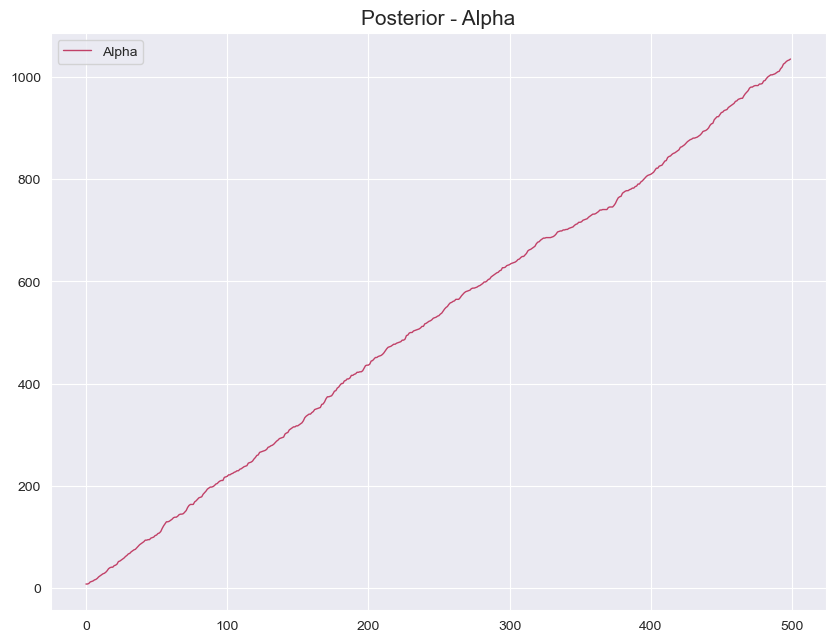

In [14]:
plt.figure(figsize=(10,7.5))
ax = sns.lineplot(posDf[['Alpha']], palette="flare", linewidth=1)
ax.set_title(f'Posterior - Alpha',fontsize = 15)
plt.show()

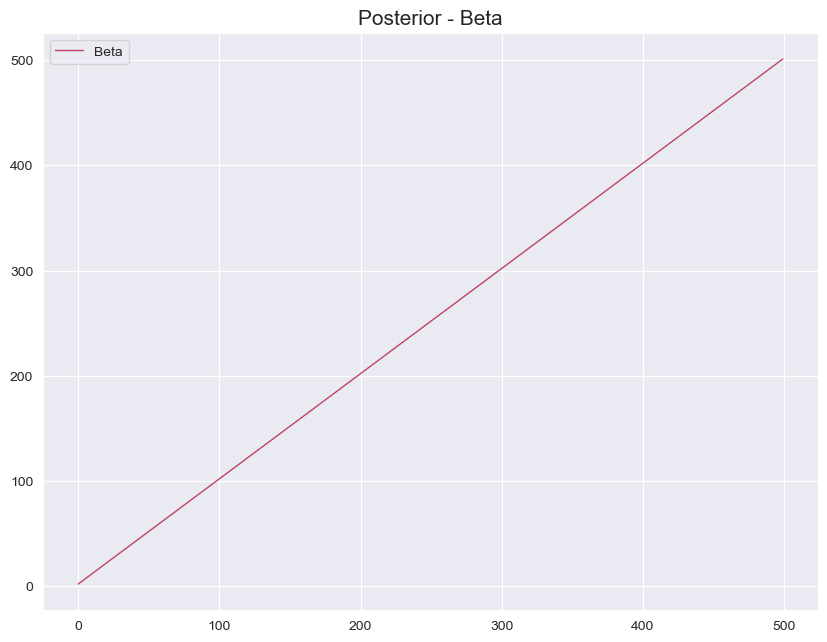

In [15]:
plt.figure(figsize=(10,7.5))
ax = sns.lineplot(posDf[['Beta']], palette="flare", linewidth=1)
ax.set_title(f'Posterior - Beta',fontsize = 15)
plt.show()

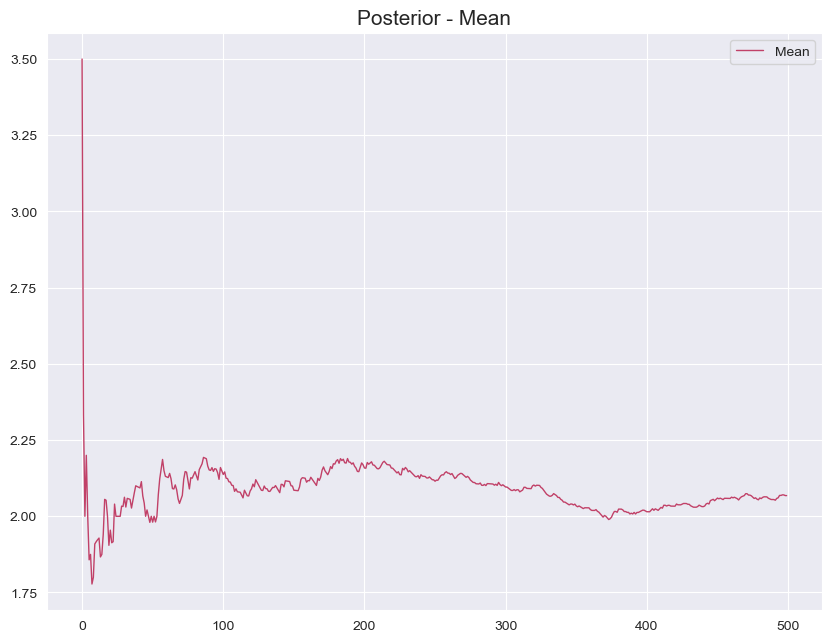

In [16]:
plt.figure(figsize=(10,7.5))
ax = sns.lineplot(posDf[['Mean']], palette="flare", linewidth=1)
ax.set_title(f'Posterior - Mean',fontsize = 15)
plt.show()

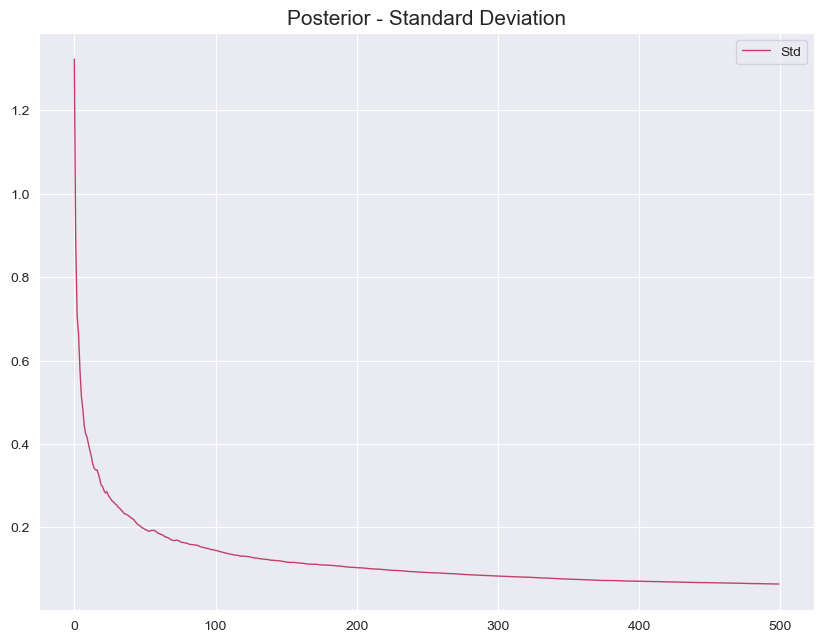

In [17]:
plt.figure(figsize=(10,7.5))
ax = sns.lineplot(posDf[['Std']], palette="flare", linewidth=1)
ax.set_title(f'Posterior - Standard Deviation',fontsize = 15)
plt.show()

## (d)

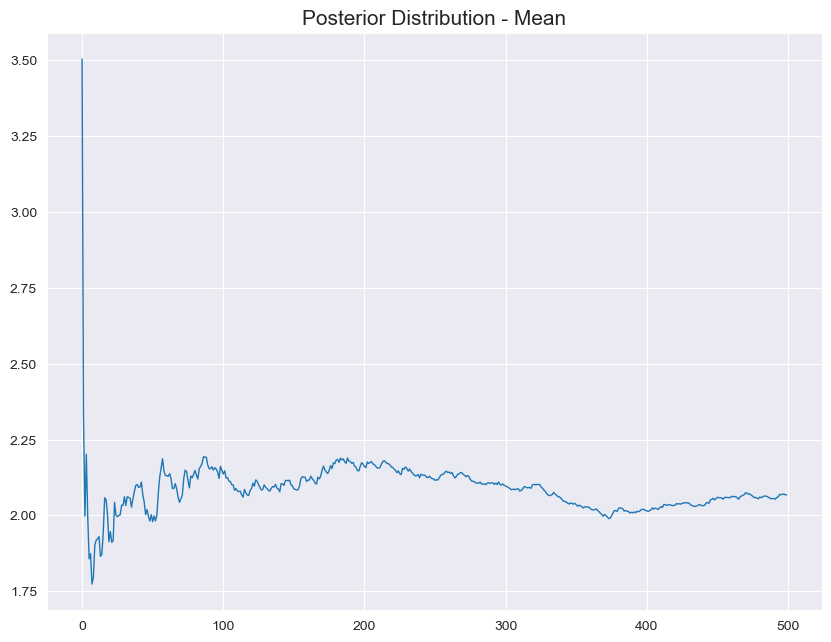

In [19]:
# Mean from the sample distributions
plt.figure(figsize=(10,7.5))
ax = sns.lineplot(pos_sample.mean().values, palette="flare", linewidth=1)
ax.set_title(f'Posterior Distribution - Mean',fontsize = 15)
plt.show()

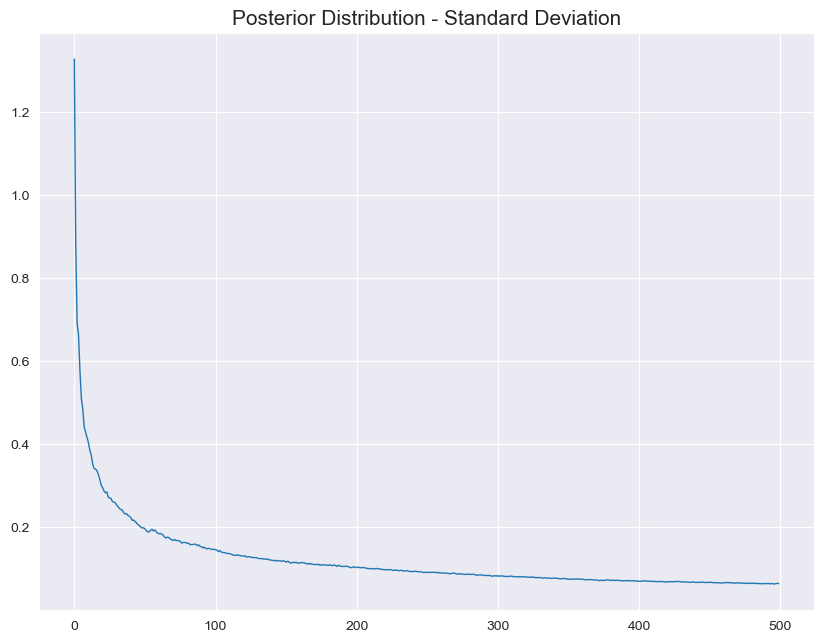

In [20]:
# Std from the sample distributions
plt.figure(figsize=(10,7.5))
ax = sns.lineplot(pos_sample.std().values, palette="flare", linewidth=1)
ax.set_title(f'Posterior Distribution - Standard Deviation',fontsize = 15)
plt.show()

## (e)

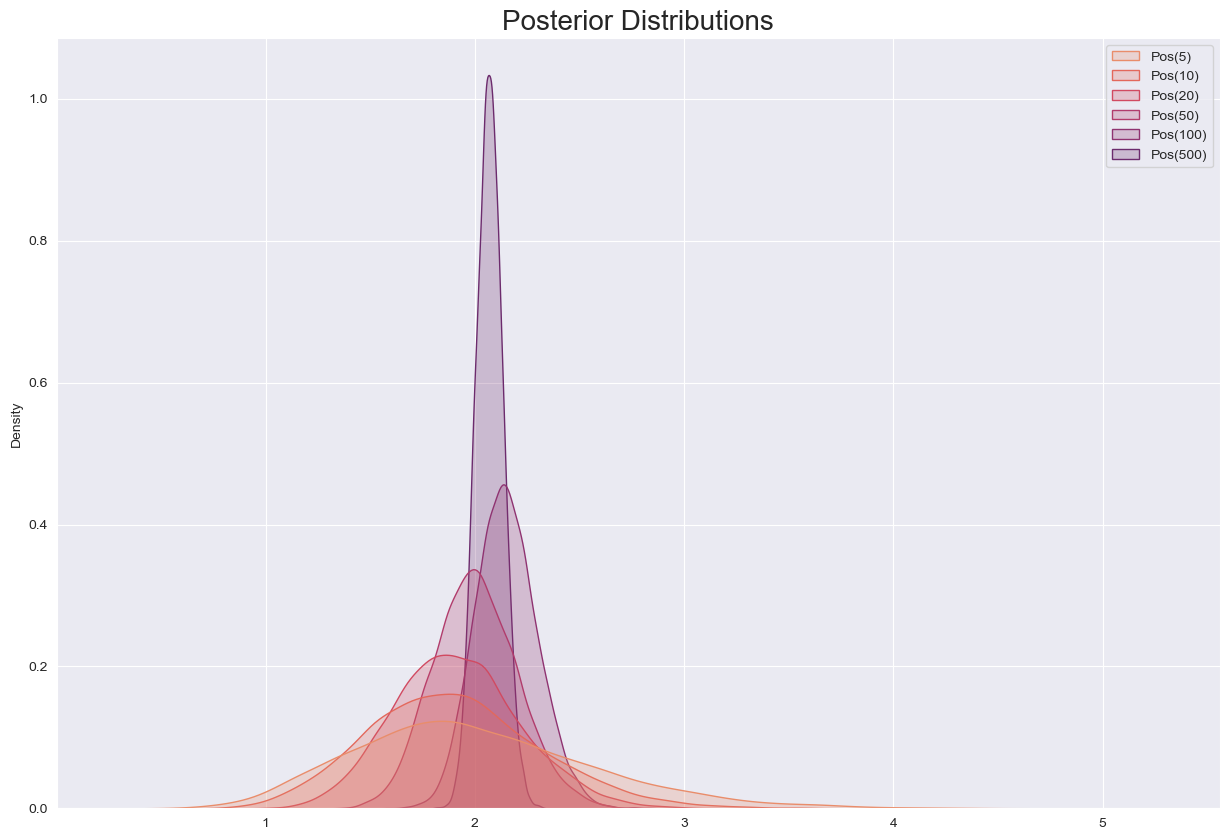

In [22]:
subset_pos = pos_sample[[f'Pos({i})' for i in [5, 10, 20, 50, 100, 500]]]
plt.figure(figsize=(15,10))
ax = sns.kdeplot(data = subset_pos, fill=True, palette="flare",linewidth=1, alpha = 0.25)
ax.set_title(f'Posterior Distributions',fontsize = 20)
plt.show()

## (f)

From class, we know that the Bayes estimator considering the quadratic loss function is equal to the mean of the posterior distribution

In [25]:
bayesDf = pd.DataFrame()

In [26]:
bayesDf['Estimator'] = pos_sample.mean()
bayesDf['Std'] = bayesDf['Estimator'].rolling(len(bayesDf),min_periods=2).std()
bayesDf.fillna(0, inplace = True)

In [27]:
confidence_level = [0.90, 0.95, 0.99]
for level in confidence_level:
    z = norm(0,1).ppf(level)
    bayesDf[f'U{level}'] = bayesDf['Estimator'] + z*bayesDf['Std']
    bayesDf[f'L{level}'] = bayesDf['Estimator'] - z*bayesDf['Std']

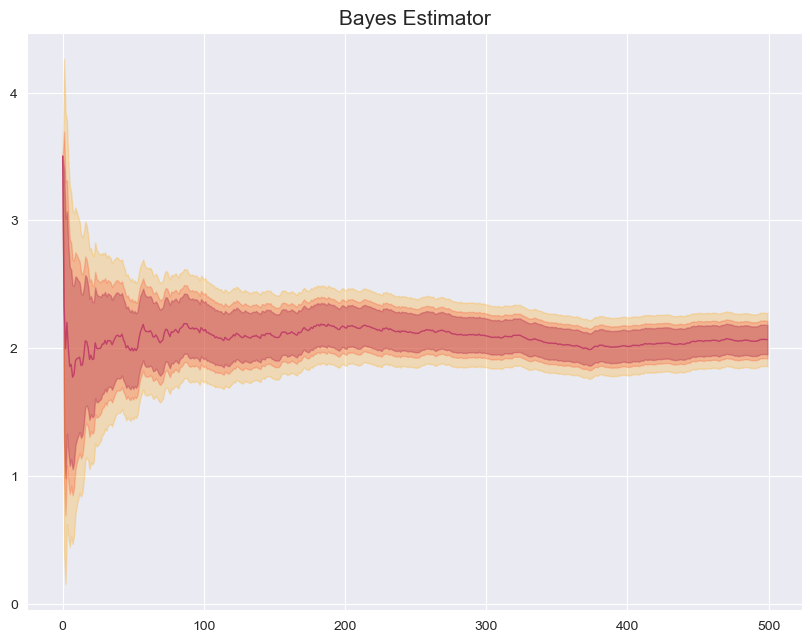

In [28]:
plt.figure(figsize=(10,7.5))
ax = sns.lineplot(bayesDf[['Estimator']].values, palette = 'flare', linewidth=1, legend = False)
ax.fill_between(list(range(500)), bayesDf[f'L{0.90}'].values, bayesDf[f'U{0.90}'].values, color = 'purple', alpha=.35)
ax.fill_between(list(range(500)), bayesDf[f'L{0.95}'].values, bayesDf[f'U{0.95}'].values, color = 'red', alpha=.20)
ax.fill_between(list(range(500)), bayesDf[f'L{0.99}'].values, bayesDf[f'U{0.99}'].values, color = 'orange', alpha=.25)
ax.set_title(f'Bayes Estimator',fontsize = 15)
plt.show()

## (g)

We know that the MLE of the poisson distribution is the sample mean. Then the asympthotic distribution is normal and the variance is
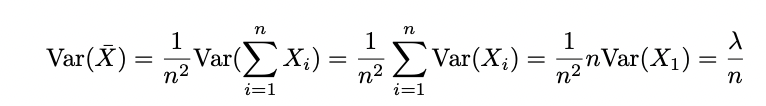

Then:

In [31]:
print(f'MLE: {sample.mean().values[0]} | SE of the MLE: {round(np.sqrt(theta/500),4)}')

MLE: 2.066 | SE of the MLE: 0.0632


## (h)

In [33]:
mleDf = pd.DataFrame()
mleDf['Estimator'] = sample.rolling(len(sample),min_periods=2).mean()
mleDf['Std'] = mleDf.rolling(len(mleDf),min_periods=2).std()
mleDf.fillna(0, inplace = True)

for level in confidence_level:
    z = norm(0,1).ppf(level)
    mleDf[f'U{level}'] = mleDf['Estimator'] + z*mleDf['Std']
    mleDf[f'L{level}'] = mleDf['Estimator'] - z*mleDf['Std']

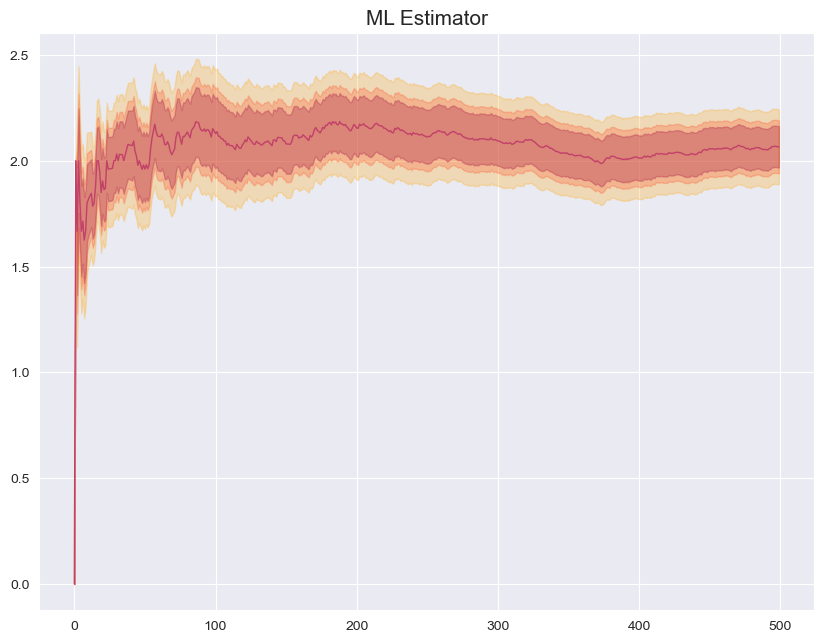

In [34]:
plt.figure(figsize=(10,7.5))
ax = sns.lineplot(mleDf[['Estimator']].values, palette = 'flare', linewidth=1, legend = False)
ax.fill_between(list(range(500)), mleDf[f'L{0.90}'].values, mleDf[f'U{0.90}'].values, color = 'purple', alpha=.35)
ax.fill_between(list(range(500)), mleDf[f'L{0.95}'].values, mleDf[f'U{0.95}'].values, color = 'red', alpha=.20)
ax.fill_between(list(range(500)), mleDf[f'L{0.99}'].values, mleDf[f'U{0.99}'].values, color = 'orange', alpha=.25)
ax.set_title(f'ML Estimator',fontsize = 15)
plt.show()

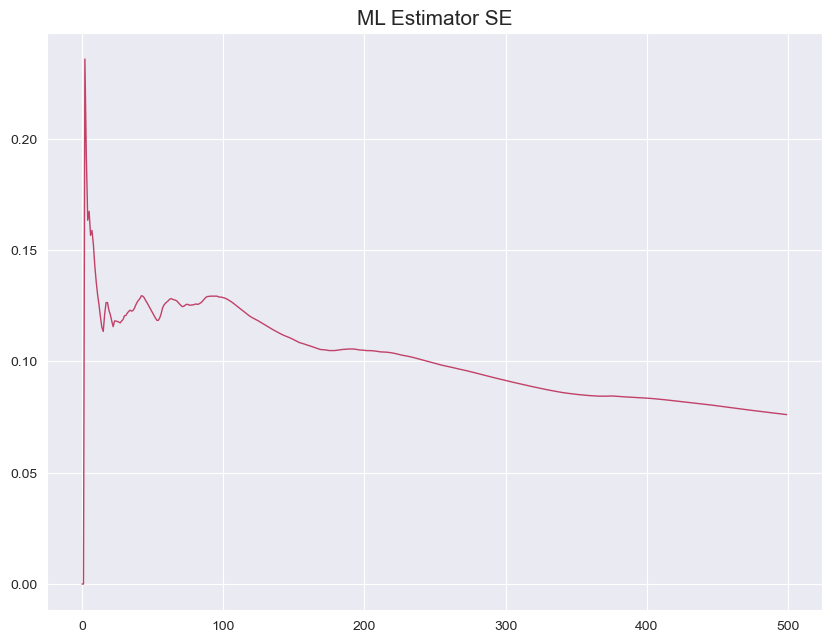

In [35]:
plt.figure(figsize=(10,7.5))
ax = sns.lineplot(mleDf[['Std']].values, palette = 'flare', linewidth=1, legend = False)
ax.set_title(f'ML Estimator SE',fontsize = 15)
plt.show()

## (i)

The MLE seem to converge more rapidly and being more consistant as an estimator in comparisson with the Bayes estimator. As the number of samples got bigger the both estimators shown to decrease their variance in a similar maner, although the MLE performed better. Worth mentioning that the MLE simulation was less computative demanding.